In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

### 1. Cross Curve data

$$
\begin{aligned}z & \sim \mathcal{N}(0,1) \\\epsilon & \sim \mathcal{N}\left(0, \sigma_{\epsilon}^{2} \cdot I\right) \\u(z) &=(0.6+1.8 \cdot \Phi(z)) \pi \\ 
x \mid z&=\underbrace{\left[\begin{array}{c}
\frac{\sqrt{2}}{2} \cdot \frac{\cos (u(z))}{\sin (u(z))^{2}+1} \\
\sqrt{2} \cdot \frac{\cos (u(z)) \sin (u(z))}{\sin (u(z))^{2}+1}
\end{array}\right]}_{f_{\theta_{\mathrm{GT}}}(z)}+\epsilon\end{aligned}
$$

here $\Phi(z)$ is the Gaussian $\mathrm{CDF}$ and $\sigma_{\epsilon}^{2}=0.02$

In [2]:
# Synthesize data
u = lambda z: np.pi*(0.6+1.8*norm.cdf(z))
f1 = lambda u: (1./np.sqrt(2))*(np.cos(u)/((np.sin(u))**2 + 1.))
f2 = lambda u: (np.sqrt(2)) * (np.cos(u) * np.sin(u))/((np.sin(u))**2 + 1.)

sample_nums = 10000
z_list = np.random.normal(0,1,sample_nums)

u_list = u(z_list)

f1_list = f1(u_list) + np.random.normal(0, np.sqrt(0.02), sample_nums)
f2_list = f2(u_list) + np.random.normal(0, np.sqrt(0.02), sample_nums)

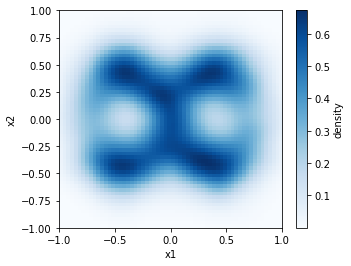

In [3]:
# Demonstrate data
data = np.vstack([f1_list, f2_list])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-1, 1, 60)
ygrid = np.linspace(-1, 1, 60)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.figure(figsize=(5,4))
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-1, 1, -1, 1],
           cmap='Blues')
plt.xlabel('x1')
plt.ylabel('x2')
cb = plt.colorbar()
cb.set_label("density")

In [4]:
# Save data
np.save(r'CrossCurves_x.npy',np.vstack((f1_list,f2_list)))
np.save(r'CrossCurves_z.npy',z_list)

### Three clusters data

$$
\begin{aligned}z & \sim \mathcal{N}(0,1) \\\epsilon & \sim \mathcal{N}\left(0, \sigma_{\epsilon}^{2} \cdot I\right) \\u(z) &=\frac{2 \pi}{1+e^{-\frac{1}{2} \pi z}} \\ t(u)&=2 \cdot \tanh (10 \cdot u-20 \cdot\lfloor u / 2\rfloor-10)+4 \cdot\lfloor u / 2\rfloor+2 \\ x \mid z&=\underbrace{\left[\begin{array}{c}
\cos (t(u(z))) \\
\sin (t(u(z)))
\end{array}\right]}_{f_{\theta_{\mathrm{GT}}}(z)}+\epsilon\end{aligned}
$$

${\sigma}_{\epsilon}^{2}=0.2$

In [5]:
u = lambda z: (2*np.pi)/(1.+np.exp(-0.5*np.pi*z))
t = lambda u: 2*np.tanh(10*u - 20*np.floor(u/2.) -10.) + 4.*np.floor(u/2.) + 2
f1 = lambda t: np.cos(t)
f2 = lambda t: np.sin(t)

In [7]:
sample_nums = 10000
z_list = np.random.normal(0,1,sample_nums)

u_list = u(z_list)
t_list = t(u_list)
f1_list = f1(t_list) + np.random.normal(0, np.sqrt(0.2), sample_nums)
f2_list = f2(t_list) + np.random.normal(0, np.sqrt(0.2), sample_nums)

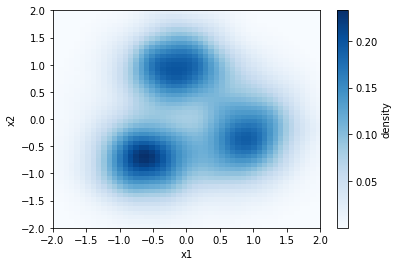

In [8]:
# Demonstrate data
data = np.vstack([f1_list, f2_list])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-2, 2, 50)
ygrid = np.linspace(-2, 2, 50)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-2, 2, -2, 2],
           cmap='Blues')
plt.xlabel('x1')
plt.ylabel('x2')
cb = plt.colorbar()
cb.set_label("density")

In [9]:
# Save data
np.save(r'ThreeClusters_x.npy',np.vstack((f1_list,f2_list)))
np.save(r'ThreeClusters_z.npy',z_list)